# Artificial Intelligence
# 464/664
# Assignment #3

## General Directions for this Assignment

00. We're using a Jupyter Notebook environment (tutorial available here: https://jupyter-notebook-beginner-guide.readthedocs.io/en/latest/what_is_jupyter.html),
01. Read the entire notebook before beginning your work, 
02. Output format should be exactly as requested, 
03. Each helper function should be preceeded by documentation (Markdown cell),
05. No comments in the code; anything worth mentioning should be included in the documentation,
06. Keep functions to 20 lines or less (including empty lines so do not add any),
08. Use descriptive variable names,
09. Functions should do only one thing,
10. Check submission deadline on Gradescope, 
11. Rename the file to Last_First_assignment_2, 
12. Submit your notebook (as .ipynb, not PDF) using Gradescope, and
13. Do not submit any other files.


## Directions _not_ applicable for this Assignment:
* Do not use classes,
* Each helper function should be followed by three assert-style unit tests.


## Before You Submit...

1. Re-read the general instructions provided above, and
2. Hit "Kernel"->"Restart & Run All".

# Problem #1: Multiagent Systems

## The World

A `List of Lists` is used to represent the world. Cells marked as '⬛' are obstacles in the world and are not traversable.

In [1]:
world = [
['⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜'],
['⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜'],
['⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜'],
['⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜'],
['⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜'],
['⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜'],
['⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜'],
['⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜'],
['⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜'],
['⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬛','⬛','⬛','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜'],
['⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬛','⬛','⬛','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜'],
['⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬛','⬛','⬛','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜'],
['⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜'],
['⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜'],
['⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜'],
['⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜'],
['⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜'],
['⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜'],
['⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜'],
['⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜'],
['⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜']]

In [2]:
# A nicer view of the world, without commas and brackets
for row in world:
    print("".join(row))

⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬛⬛⬛⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬛⬛⬛⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬛⬛⬛⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜


## Robot

Our robot '🤖' starts at the bottom left and can either move up, down, left, or right. It's looking for the '❤️' in the world. 

In [3]:
MOVES = [(-1,0), (0,1), (1,0), (0,-1)] # Up Right Down Left

In [4]:
start = (len(world)-1, 0)

In [5]:
goal = (0, len(world)-1)

## Other Agents

There are four other agents in the world: '🚎', '🚎', '🚎', and '🚎'.

In [6]:
# Update the world with this information
world[start[0]][start[1]] = '🤖'
world[start[0]][start[1]+2] = '🚎'
world[start[0]][start[1]+4] = '🚎'
world[start[0]][start[1]+6] = '🚎'
world[start[0]][start[1]+8] = '🚎'
world[goal[0]][goal[1]] = '❤️'

In [7]:
# A nicer view of the world, without commas and brackets
for row in world:
    print("".join(row))

⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜❤️
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬛⬛⬛⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬛⬛⬛⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬛⬛⬛⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
🤖⬜🚎⬜🚎⬜🚎⬜🚎⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜


## Problem #1


'🤖' is your robot from Assignment #1 and uses the A$^*$ search function to find the optimal path to goal. Each '🚎' has no such capability; all it can do is swarm. Each '🚎' uses Boids Rules (repulsion and attraction only) with another '🚎' and '🤖'. Implement this multiagent system consisting of an intelligent '🤖' robot and four '🚎' agents. 

* Our A$^*$ robot '🤖' does not use Boids Rule, but is the de-facto leader of the swarm since the '🚎' agents swarm with it. 

* Print out the resulting view of the world ('🤖', '🚎', '⬛', and '❤️' icons) **for each step** '🤖' takes on its way to '❤️'. (Assignment #1 only asked for the final output. This assignment asks for a print of the world after each step taken by '🤖'.)

* Use a repulsion range of 2 and a suitable attraction range that keeps the swarm together.

* '🚎' shouldn't leave the world

* '🚎' locations may need to be rounded when placed on the world for printing

In [8]:
from copy import deepcopy
import math
import queue

# Constants
COORDS = 0
PARENT = 1
UP_CHILD = 2
RIGHT_CHILD = 3
DOWN_CHILD = 4
LEFT_CHILD = 5
ELEMENT = 6 # ⬛, ⬜, 🟨, 🟩, 🤖, or ❤️
SLD = 7 # sld to goal

AGENT_1_START = (start[0], start[1]+2)
AGENT_2_START = (start[0], start[1]+4)
AGENT_3_START = (start[0], start[1]+6)
AGENT_4_START = (start[0], start[1]+8)

<a id="Snapshot"></a>
# Snapshot

This class represents a snapshot for a given board configuration.

### Parameters:
* **character** `str`: The character representing the player in the game (e.g., '🤖' for the good robot or '👾' for the bad robot).
* **start_position** `Tuple[int, int]`: The initial position of the player on the game board, represented as coordinates (row, column).
* **utility_function** `Callable`: A function that evaluates the utility of a game state, used by the player when making decisions.
* **decision_strategy** `str`: The strategy the player uses to make decisions. Possible values include:
    * `"minimax"`: Uses the Minimax algorithm to determine the best move.
    * `"random"`: Selects a move randomly.
* **simulation_depth** `int` (optional): The depth of simulation for strategies like Minimax. Defaults to 0.

### Attributes:
* **character** `str`: The character symbol representing the player (e.g., '🤖', '👾').
* **opponent** `Player or None`: The player's opponent in the game. This attribute is set later using the `set_opponent` method.
* **position** `Tuple[int, int]`: The current position of the player on the game board.
* **utility_function** `Callable`: A function used to evaluate the utility of the player's current position and state.
* **decision_strategy** `str`: The decision-making strategy for the player, such as "minimax" or "random".
* **simulation_depth** `int`: The depth of the Minimax algorithm or similar strategy, influencing the complexity of the player's decision-making.

### Methods:

---

<a id="print_world"></a>
## print_world

This function prints out a formatted "world" (a list). 

* **arg_1** list: world to print
* **arg_2** printing: option to print world in notebook (default = True)

**returns** 

* **string** string: a string representation of the world

---

In [9]:
class Snapshot:
    
    def __init__(self, world, robot_position, agent_1_position, agent_2_position, agent_3_position, agent_4_position):
        self.world = world
        self.robot_position = robot_position
        self.agent_1_position = agent_1_position
        self.agent_2_position = agent_2_position
        self.agent_3_position = agent_3_position
        self.agent_4_position = agent_4_position
        
    def print_world(self):
        for row in self.world:
            print("".join(row))
                
    

<a id="get_sld"></a>
## get_sld 

This function finds the straightline distance between two nodes using distance formula.

* **arg_1** node_1: first node 
* **arg_2** node_2: second node

**returns** 

* **sld** num: a decimal number that is the straightline distance between nodes 1 and 2

In [10]:
def get_sld(node_1, node_2):
    ROW = 0
    COL = 1
    return math.sqrt((node_2[ROW] - node_1[ROW]) ** 2 + (node_2[COL] - node_1[COL]) ** 2)

<a id="initialize_nodes"></a>
## initialize_nodes

This function creates nodes (with default properties) dictionary from a world (list).

* **arg_1** nodes: nodes dictionary to be updated
* **arg_2** goal: goal used to calculate straight-line distance
* **arg_3** world: world to create nodes from

In [11]:
def initialize_nodes(nodes, goal, world):
    for row in range(len(world)):
        for col in range(len(world)): 
            node = (row, col)
            nodes[node] = [node, None, None, None, None, None, world[row][col], get_sld(node, goal)]

<a id="initialize_explored"></a>
## initialize_explored

This function creates a map of explored nodes, initializing all nodes to not explored (False). 

* **arg_1** explored: explored dictionary to be updated
* **arg_2** world: world to create nodes from

In [12]:
def initialize_explored(explored, world):
    for row in range(len(world)):
        for col in range(len(world)): 
            explored[(row, col)] = False

<a id="translate_world"></a>
## translate_world

This function creates a new world (2D array) from nodes dictionary info.

* **arg_1** nodes: nodes to be translated into world
* **arg_2** world: new world  

In [13]:
def translate_world(nodes, world):
    new_world = [ [0]*len(world) for i in range(len(world))]
    for row in range(len(world)):
        for col in range(len(world)): 
            new_world[row][col] = nodes[(row, col)][ELEMENT]
    return new_world

<a id="create_snapshots"></a>
## create_snapshots

This function traverses the path back from the goal to the start via parent nodes property.

* **arg_1** start: starting point of robot
* **arg_2** goal: goal of search algorithm 
* **arg_3** nodes: nodes within world  

In [14]:
def create_snapshots(start, goal, nodes, world):
    nodes[start][ELEMENT] = '⬜'
    curr_node = nodes[goal][COORDS]
    snapshots = []
    while not curr_node == None:
        nodes[curr_node][ELEMENT] = '🤖'

        snapshot = Snapshot(translate_world(nodes, world), nodes[curr_node][COORDS], AGENT_1_START, AGENT_2_START, AGENT_3_START, AGENT_4_START)
        snapshots.insert(0, snapshot)
#         snapshot.print_world()
        nodes[curr_node][ELEMENT] = '⬜'
        curr_node = nodes[curr_node][PARENT]
    return snapshots

<a id="get_up_child"></a>
## get_up_child 

This function gets the upper child of a node in the world.

* **arg_1** node: node to get upper child of

**returns** 

* **up_child** node: the upper child of node

In [15]:
def get_up_child(node):
    ROW = 0
    COL = 1
    if node[COORDS][ROW] == 0:
        return None
    return (node[COORDS][ROW] - 1, node[COORDS][COL])

<a id="get_right_child"></a>
## get_right_child 

This function gets the right child of a node in the world.

* **arg_1** node: node to get right child of
* **arg_2** world: world to grab dimensions of

**returns** 

* **right_child** node: the right child of node

In [16]:
def get_right_child(node, world):
    ROW = 0
    COL = 1
    if node[COORDS][COL] == len(world[ROW]) - 1:
        return None
    return (node[COORDS][ROW], node[COORDS][COL] + 1)

<a id="get_down_child"></a>
## get_down_child 

This function gets the down child of a node in the world.

* **arg_1** node: node to get down child of
* **arg_2** world: world to grab dimensions of

**returns** 

* **down_child** node: the down child of node

In [17]:
def get_down_child(node, world):
    ROW = 0
    COL = 1
    if node[COORDS][ROW] == len(world) - 1:
        return None
    return (node[COORDS][ROW] + 1, node[COORDS][COL])

<a id="get_left_child"></a>
## get_left_child 

This function gets the left child of a node in the world.

* **arg_1** node: node to get left child of

**returns** 

* **left_child** node: the left child of node

In [18]:
def get_left_child(node):
    ROW = 0
    COL = 1
    if node[COORDS][COL] == 0:
        return None
    return (node[COORDS][ROW], node[COORDS][COL] - 1)

<a id="handle_up_child"></a>
## handle_up_child

This function handles operations on the up child of a node when visited.

* **arg_1** nodes: dictionary holding all nodes in the world 
* **arg_2** node: parent node of up child in question
* **arg_3** explored: dictionary holding explored status of nodes
* **arg_4** frontier: data structure holding nodes to be checked
* **arg_5** timestamp: counter to ensure FIFO for priority queue

In [19]:
def handle_up_child(nodes, node, explored, frontier, timestamp=0):
    up_child = get_up_child(nodes[node])
    if not up_child == None:
        if not nodes[up_child][ELEMENT] == '⬛' and not explored[up_child]:
            nodes[node][UP_CHILD] = up_child
            nodes[up_child][PARENT] = node
            frontier.put((nodes[up_child][SLD], (timestamp, up_child)))
            explored[up_child] = True

<a id="handle_right_child"></a>
## handle_right_child

This function handles operations on the right child of a node when visited.

* **arg_1** nodes: dictionary holding all nodes in the world 
* **arg_2** node: parent node of right child in question
* **arg_3** explored: dictionary holding explored status of nodes
* **arg_4** frontier: data structure holding nodes to be checked
* **arg_5** timestamp: counter to ensure FIFO for priority queue

In [20]:
def handle_right_child(nodes, node, explored, frontier, timestamp=0):
    right_child = get_right_child(nodes[node], world)
    if not right_child == None:
        if not nodes[right_child][ELEMENT] == '⬛' and not explored[right_child]:
            nodes[node][RIGHT_CHILD] = right_child
            nodes[right_child][PARENT] = node
            frontier.put((nodes[right_child][SLD], (timestamp, right_child)))
            explored[right_child] = True

<a id="handle_down_child"></a>
## handle_down_child

This function handles operations on the down child of a node when visited.

* **arg_1** nodes: dictionary holding all nodes in the world 
* **arg_2** node: parent node of down child in question
* **arg_3** explored: dictionary holding explored status of nodes
* **arg_4** frontier: data structure holding nodes to be checked
* **arg_5** timestamp: counter to ensure FIFO for priority queue

In [21]:
def handle_down_child(nodes, node, explored, frontier, timestamp=0):
    down_child = get_down_child(nodes[node], world)
    if not down_child == None:
        if not nodes[down_child][ELEMENT] == '⬛' and not explored[down_child]:
            nodes[node][DOWN_CHILD] = down_child
            nodes[down_child][PARENT] = node
            frontier.put((nodes[down_child][SLD], (timestamp, down_child)))
            explored[down_child] = True

<a id="handle_left_child"></a>
## handle_left_child

This function handles operations on the left child of a node when visited.

* **arg_1** nodes: dictionary holding all nodes in the world 
* **arg_2** node: parent node of left child in question
* **arg_3** explored: dictionary holding explored status of nodes
* **arg_4** frontier: data structure holding nodes to be checked
* **arg_5** timestamp: counter to ensure FIFO for priority queue

In [22]:
def handle_left_child(nodes, node, explored, frontier, timestamp=0):
    left_child = get_left_child(nodes[node])
    if not left_child == None:
        if not nodes[left_child][ELEMENT] == '⬛' and not explored[left_child]:
            nodes[node][LEFT_CHILD] = left_child
            nodes[left_child][PARENT] = node
            frontier.put((nodes[left_child][SLD], (timestamp, left_child)))
            explored[left_child] = True

<a id="initialize_search"></a>
## initialize_search

This function initializes variables needed for searching graph.

* **arg_1** nodes: dictionary holding all nodes in the world 
* **arg_2** explored: dictionary holding explored status of nodes
* **arg_3** frontier: data structure holding nodes to be checked
* **arg_4** start: start node for robot spawn
* **arg_5** goal: goal to serach for by robot
* **arg_6** world: world in which robot and goal dwell
* **arg_7** timestamp: counter to ensure FIFO for priority queue

In [23]:
def initialize_search(nodes, explored, frontier, start, goal, world, timestamp=0):
    initialize_nodes(nodes, goal, world)
    initialize_explored(explored, world)
    explored[start] = True
    frontier.put((nodes[start][SLD], (timestamp, start)))

<a id="a_star_search"></a>
## a_star_search

This function executes a variant of Breadth-First Search, utilizing a PriorityQueue to handle all frontier operations. A PriorityQueue is used because it is a FIFO data structure and the A* algorithm requires that children nodes be visited in the order of increasing straightline distance from the goal, using an accpetable heuristic that allows it to more-efficiently look for goal. Nodes are popped from the Queue such that the move priority (Up, Right, Down, & Left) is preserved.

* **world**: the search area
* **start**: the starting location of the robot
* **goal**: the goal location in the search area

**returns** None (but prints out a nice view of the world and replaces appropriate cells using '🟨' and '🟩').

In [24]:
def a_star_search(world, start, goal):
    nodes, explored, frontier, timestamp, NODE = {}, {}, queue.PriorityQueue(), 0, 1
    initialize_search(nodes, explored, frontier, start, goal, world, timestamp)
    timestamp = timestamp + 1
    while not frontier.empty():
        node = frontier.get()[1][NODE]
        if node == goal:
            break  
        else:
            handle_up_child(nodes, node, explored, frontier, timestamp)
            timestamp = timestamp + 1
            handle_right_child(nodes, node, explored, frontier, timestamp)
            timestamp = timestamp + 1
            handle_down_child(nodes, node, explored, frontier, timestamp)
            timestamp = timestamp + 1
            handle_left_child(nodes, node, explored, frontier, timestamp)
            timestamp = timestamp + 1
    return create_snapshots(start, goal, nodes, world)

In [40]:
a_star_world = deepcopy(world)
snapshots = a_star_search(a_star_world, start, goal)
snapshots[40].print_world()

⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜🤖
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬛⬛⬛⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬛⬛⬛⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬛⬛⬛⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜🚎⬜🚎⬜🚎⬜🚎⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜


# Problem #2: Game Theory

We are designing an experiment where two players employ the *Best Response with Inertia* algorithm against each other.

## Best Response with Inertia Algorithm

Here is the outline of the algorithm for each player:


```
On day zero, play a random action

On day t, do one of two things:

    * With high probability, play the best response to what your opponent did yesterday, or
    * With low probability, be lazy and just do what you did yesterday.
```

## Game

The particular 2x2 game being played is the Stag-Hunt game, with the matrix:


|  | | |
|---|---|---|
|  | S | H |
| S | 3, 3 | 0, 2 |
| H | 2, 0 | 2, 2 |


Player 1 (P1) is the `row` player; Player 2 (P2) is the `col` player.

In [26]:
import random
import matplotlib.pyplot as plt

In [27]:
# The actions available to each player. Don't modify. 
actions_P1 = ['S', 'H']
actions_P2 = ['S', 'H']

# Store the history. Don't modify. 
history_P1_action, history_P1_utility = [], []
history_P2_action, history_P2_utility = [], []

<a id="get_utility"></a>
## get_utility

This function takes a joint action tuple and returns the utility for each player, packaged as a tuple. It is hardcoded for the Stag-Hunt game described above.

* **a** Tuple: joint action. a could be ('S', 'H'), for instance, which would signify that P1 has chosen to do 'S' and P2 has chosen to do 'H'.


**returns** 

* **utility** Tuple: the utility for each player as (utility of P1, utility of P2). For example, if the input is ('S', 'H'), the returned value is (0, 2) -- 0 for P1, 2 for P2. 

In [28]:
def get_utility(a):
    if a[0] == 'S' and a[1] == 'S':
        return (3, 3)
    elif a[0] == 'S' and a[1] == 'H':
        return (0, 2)
    elif a[0] == 'H' and a[1] == 'S':
        return (2, 0)
    elif a[0] == 'H' and a[1] == 'H':
        return (2, 2)

<div style="background: lemonchiffon; margin:20px; padding: 20px;">
    <p>
        TODO: Help players pick actions based on the <i>Best Response with inertia</i> algorithm described above (instead of just picking 'S' like they are now). 
    </p>
</div>

<a id="run_experiment"></a>
## run_experiment

This functions runs an experiment where two players play the Stag-Hunt game using the Best Response with Inertia algorithm.

* **num_trials** Int: The number of trials to run
* **num_days** Int: The number of days in each trial
* **debug** Bool: If set to True, statements are printed out


**returns** 

None

In [29]:
def run_experiment(num_trials, num_days, debug=True):
    if debug: print(f"Trial\tDay\tP1\tP2\n--------------------------")
    for trial in range(num_trials):  
        if debug: print(f"--------------------------")
        for day in range(num_days):
            high_probability = 0.75
            if day == 0:
                action_P1, action_P2 = random.choice(actions_P1), random.choice(actions_P2)
            else:
                yesterday = (trial * num_days) + day - 1
                action_P1 = history_P2_action[yesterday] if random.random() <= high_probability else history_P1_action[yesterday]
                action_P2 = history_P1_action[yesterday] if random.random() <= high_probability else history_P2_action[yesterday]
            utility_P1, utility_P2 = get_utility(tuple((action_P1, action_P2)))
            history_P1_action.append(action_P1)
            history_P2_action.append(action_P2)
            history_P1_utility.append(utility_P1)
            history_P2_utility.append(utility_P2)
            if debug: print(f"{trial}\t{day}\t{action_P1}\t{action_P2}")

In [30]:
# Parameters. Don't modify. Not even debug flag. 
run_experiment(num_trials=20, num_days=10, debug=True)

Trial	Day	P1	P2
--------------------------
--------------------------
0	0	S	H
0	1	S	S
0	2	S	S
0	3	S	S
0	4	S	S
0	5	S	S
0	6	S	S
0	7	S	S
0	8	S	S
0	9	S	S
--------------------------
1	0	S	H
1	1	H	S
1	2	S	H
1	3	S	S
1	4	S	S
1	5	S	S
1	6	S	S
1	7	S	S
1	8	S	S
1	9	S	S
--------------------------
2	0	S	S
2	1	S	S
2	2	S	S
2	3	S	S
2	4	S	S
2	5	S	S
2	6	S	S
2	7	S	S
2	8	S	S
2	9	S	S
--------------------------
3	0	S	S
3	1	S	S
3	2	S	S
3	3	S	S
3	4	S	S
3	5	S	S
3	6	S	S
3	7	S	S
3	8	S	S
3	9	S	S
--------------------------
4	0	S	H
4	1	H	S
4	2	S	H
4	3	S	S
4	4	S	S
4	5	S	S
4	6	S	S
4	7	S	S
4	8	S	S
4	9	S	S
--------------------------
5	0	S	S
5	1	S	S
5	2	S	S
5	3	S	S
5	4	S	S
5	5	S	S
5	6	S	S
5	7	S	S
5	8	S	S
5	9	S	S
--------------------------
6	0	S	H
6	1	H	S
6	2	S	S
6	3	S	S
6	4	S	S
6	5	S	S
6	6	S	S
6	7	S	S
6	8	S	S
6	9	S	S
--------------------------
7	0	H	S
7	1	H	H
7	2	H	H
7	3	H	H
7	4	H	H
7	5	H	H
7	6	H	H
7	7	H	H
7	8	H	H
7	9	H	H
--------------------------
8	0	S	S
8	1	S	S
8	2	S	S
8	3	S	S
8	4	S	S
8	5	S	S
8	6	S	S
8	7	S	S
8	8	S	S
8	

<a id="plot_results"></a>
## plot_results

This functions plots the results of an experiment using a bar chart.

* **history_P1_action** List[Str]: The history of Player 1's actions over the course of the experiment 
* **history_P2_action** List[Str]: The history of Player 2's actions over the course of the experiment 


**returns** 

None

In [31]:
def plot_results(history_P1_action, history_P2_action):
    labels = ['(S,S)', '(S,H)', '(H,S)', '(H,H)']
    cell_counts = [0, 0, 0, 0]
    for i in range(len(history_P1_action)):
        if history_P1_action[i] == 'S' and history_P2_action[i] == 'S':
            cell_counts[0]+=1
        if history_P1_action[i] == 'S' and history_P2_action[i] == 'H':
            cell_counts[1]+=1
        if history_P1_action[i] == 'H' and history_P2_action[i] == 'S':
            cell_counts[2]+=1
        if history_P1_action[i] == 'H' and history_P2_action[i] == 'H':
            cell_counts[3]+=1
    plt.bar(labels, cell_counts)
    plt.show()

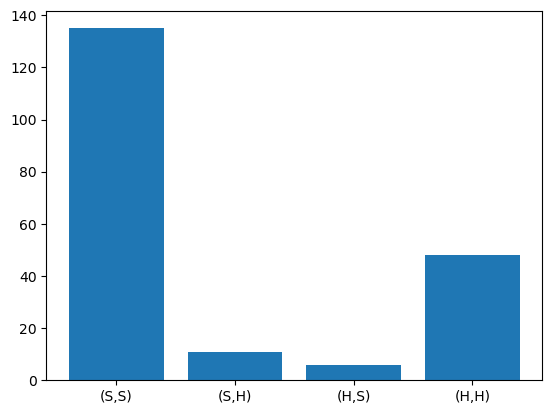

In [32]:
# Visualize the results. Don't modify. 
plot_results(history_P1_action, history_P2_action)

| Question | Response | 
|------|------|
|Where do agents get spend most of their time? | Choose one (leave your choice here and remove the other two choices): 
* Roughly 50-50 between (S,S) and (H,H)

## Before You Submit...

1. Re-read the general instructions provided above, and
2. Hit "Kernel"->"Restart & Run All".